<a href="https://colab.research.google.com/github/Felipe-DelosSantos09/Diplomado-IA/blob/master/Modelo_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelo 1

In [ ]:
%pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 2.6 MB/s eta 0:00:00
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling chardet-5.2.0:
      Successfully uninstalled chardet-5.2.0


In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="MsuoDVda6oLsTGxghLi6")
project = rf.workspace("diplomadoia").project("clasificacionmanzanas")
version = project.version(3)
dataset = version.download("yolov5")



loading Roboflow workspace...
loading Roboflow project...


In [ ]:
import os
import yaml
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import shutil

def load_yaml_config(yaml_path):
    """
    Carga un archivo de configuración YAML.

    Args:
        yaml_path (str): Ruta al archivo YAML.

    Returns:
        dict: Contenido del YAML parseado.
    """
    with open(yaml_path, 'r') as file:
        return yaml.safe_load(file)

def count_classes(labels_dir):
    """
    Cuenta las ocurrencias de cada clase en los archivos de etiquetas de un directorio dado.

    Args:
        labels_dir (str): Ruta al directorio que contiene los archivos de etiquetas.

    Returns:
        Counter: Un objeto Counter con los conteos de clases.
    """
    class_counter = Counter()
    for label_file in os.listdir(labels_dir):
        if label_file.endswith('.txt'):
            with open(os.path.join(labels_dir, label_file), 'r') as file:
                for line in file:
                    class_id = int(line.split()[0])
                    class_counter[class_id] += 1
    return class_counter

def analyze_class_balance(config_path):
    """
    Analiza el balance de clases en el conjunto de datos según lo especificado en el archivo de configuración.

    Args:
        config_path (str): Ruta al archivo de configuración YAML.

    Returns:
        pd.DataFrame: DataFrame que contiene los conteos de clases para cada división del conjunto de datos.
    """
    config = load_yaml_config(config_path)
    classes = config['names']
    datasets = ['train', 'valid', 'test']
    base_dir = os.path.dirname(config_path)

    results = {}
    for dataset in datasets:
        labels_dir = os.path.join(base_dir, dataset, 'labels')
        if os.path.exists(labels_dir):
            results[dataset] = count_classes(labels_dir)
        else:
            print(f"Advertencia: El directorio '{labels_dir}' no existe. Saltando el conjunto de datos {dataset}.")
            results[dataset] = Counter()

    # Creación del DataFrame
    df = pd.DataFrame({dataset: [results[dataset].get(i, 0) for i in range(len(classes))] for dataset in datasets}, index=classes)

    return df


def plot_class_balance(df):
    """
    Genera un gráfico de barras para visualizar el balance de clases en los diferentes conjuntos de datos.

    Args:
        df (pd.DataFrame): DataFrame que contiene los conteos de clases para cada división del conjunto de datos.
    """
    ax = df.plot(kind='bar', figsize=(10, 6), width=0.8)
    plt.title('Balance de Clases en los Conjuntos de Datos')
    plt.xlabel('Clases')
    plt.ylabel('Conteo')
    plt.xticks(rotation=45)
    plt.legend(title='Conjuntos de Datos')
    plt.tight_layout()
    plt.show()


def remove_directory_if_exists(directory_path):
    """
    Elimina un directorio si existe.

    Args:
        directory_path (str): La ruta del directorio a eliminar.
    """
    if os.path.exists(directory_path):
        shutil.rmtree(directory_path)
        print(f"Directorio '{directory_path}' eliminado exitosamente.")
    else:
        print(f"Directorio '{directory_path}' no existe.")

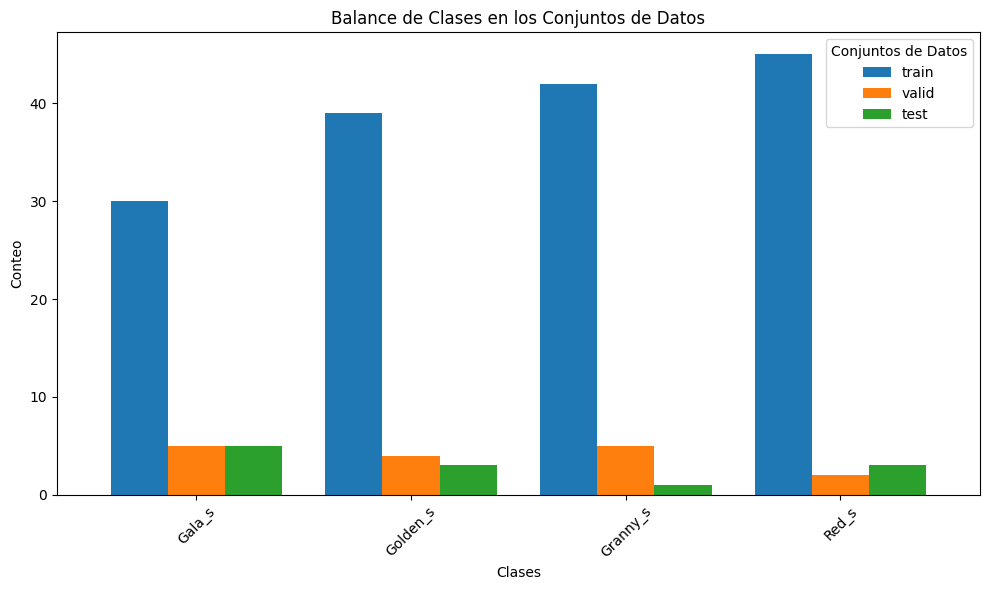

          train  valid  test
Gala_s       30      5     5
Golden_s     39      4     3
Granny_s     42      5     1
Red_s        45      2     3


In [ ]:
class_balance_df = analyze_class_balance(r'/content/ClasificacionManzanas-3/data.yaml')
plot_class_balance(class_balance_df)
print(class_balance_df)

In [ ]:
%pip install ultralytics

  Using cached ultralytics-8.2.69-py3-none-any.whl.metadata (41 kB)
  Using cached ultralytics_thop-2.0.0-py3-none-any.whl.metadata (8.5 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
Using cached ultralytics-8.2.69-py3-none-any.whl (825 kB)
Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
Using cached ultralytics_thop-2.0.0-py3-none-any.whl (25 kB)


In [ ]:
import yaml

# Definir el contenido del archivo YAML
data = {
    'names': ['Gala_s', 'Golden_s', 'Granny_s', 'Red_s'],
    'nc': 4,
    'test': '/content/ClasificacionManzanas-3/test',
    'train': '/content/ClasificacionManzanas-3/train',
    'val': '/content/ClasificacionManzanas-3/valid'
}

path = r'/content/ClasificacionManzanas-3/data.yaml'

# Escribir el contenido en un archivo YAML
with open(path , 'w') as file:
    yaml.dump(data, file, default_flow_style=False)

print("Archivo data.yaml creado exitosamente.")


Archivo data.yaml creado exitosamente.


In [ ]:
from ultralytics import YOLO

model = YOLO("yolov5mu.pt")  # Entrenamiento con pesos pre-entrenados

#model = YOLO("yolov5s.yaml") # Entrenamiento desde cero, revisar los modelos en https://docs.ultralytics.com/models/yolov5/#supported-tasks-and-modes
# NOTA: Yolov5su  has moved towards an anchor-free, objectness-free approach. Sin embargo los detalles arquitectonicos son no cambian, solo el cabezal de detección

model.train(
    data=r"/content/ClasificacionManzanas-3/data.yaml",
    task="detect",
    mode='train',
    epochs=50,          # Número de épocas de entrenamiento
    patience=100,       # Paciencia para el early stopping
    batch=16,           # Tamaño del batch
    imgsz=640,          # Tamaño de la imagen
    save=True,          # Guardar el modelo después de entrenar
    cache=False,        # Usar caché de datos
    device=None,        # Dispositivo para el entrenamiento (None para auto-detectar)
    workers=8,          # Número de workers para el data loading
    pretrained=True,    # Usar pesos pre-entrenados
    optimizer='auto',   # Optimizador
    verbose=True,       # Imprimir información durante el entrenamiento
    seed=0,             # Semilla para la reproducibilidad
    deterministic=True, # Asegurar entrenamiento determinista
    amp=True,           # Mixed precision training
    val=True,           # Validar después de cada época
    split='val',        # División para validación
    iou=0.7,            # Umbral de IoU
    max_det=300,        # Máximo número de detecciones por imagen
    lr0=0.01,           # Tasa de aprendizaje inicial
    lrf=0.01,           # Factor de reducción de la tasa de aprendizaje
    momentum=0.937,     # Momento para SGD
    weight_decay=0.0005,# Decaimiento de peso
    warmup_epochs=3.0,  # Número de épocas de calentamiento
    warmup_momentum=0.8,# Momento durante el calentamiento
    warmup_bias_lr=0.1, # Tasa de aprendizaje para el sesgo durante el calentamiento
    box=7.5,            # Pérdida de la caja
    cls=0.5,            # Pérdida de la clase
    dfl=1.5,            # Pérdida de distribución focal
    mosaic=1.0,         # Probabilidad de aplicar la técnica de mosaic
    auto_augment='randaugment', # Tipo de aumento automático
    erasing=0.4,        # Probabilidad de borrado aleatorio
    save_dir='runs/detect/train', # Directorio para guardar los resultados
    name = 'exp-YOLOV5mu'
    )

100%|██████████| 48.2M/48.2M [00:00<00:00, 219MB/s]


Ultralytics YOLOv8.2.69 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov5mu.pt, data=/content/ClasificacionManzanas-3/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=exp-YOLOV5mu, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=Tru

100%|██████████| 755k/755k [00:00<00:00, 17.3MB/s]


Overriding model.yaml nc=80 with nc=4

                   from  n    params  module                                       arguments                     
  0                  -1  1      5280  ultralytics.nn.modules.conv.Conv             [3, 48, 6, 2, 2]              
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2     65280  ultralytics.nn.modules.block.C3              [96, 96, 2]                   
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    444672  ultralytics.nn.modules.block.C3              [192, 192, 4]                 
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  6   2512896  ultralytics.nn.modules.block.C3              [384, 384, 6]                 
  7                  -1  1   2655744  ultralytics

100%|██████████| 6.25M/6.25M [00:00<00:00, 74.2MB/s]


AMP: checks passed ✅


train: Scanning /content/ClasificacionManzanas-3/train/labels... 156 images, 0 backgrounds, 0 corrupt: 100%|██████████| 156/156 [00:00<00:00, 1175.52it/s]

train: New cache created: /content/ClasificacionManzanas-3/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
val: Scanning /content/ClasificacionManzanas-3/valid/labels... 16 images, 0 backgrounds, 0 corrupt: 100%|██████████| 16/16 [00:00<00:00, 449.35it/s]

val: New cache created: /content/ClasificacionManzanas-3/valid/labels.cache


Plotting labels to runs/detect/exp-YOLOV5mu/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 91 weight(decay=0.0), 98 weight(decay=0.0005), 97 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/exp-YOLOV5mu
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      7.09G      1.282      3.695      1.635         30        640: 100%|██████████| 10/10 [00:09<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.73s/it]

                   all         16         16      0.416      0.874       0.63      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      6.96G     0.8521      1.931      1.196         32        640: 100%|██████████| 10/10 [00:04<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.20it/s]

                   all         16         16      0.504      0.981      0.738      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      7.03G     0.7478      1.311      1.097         23        640: 100%|██████████| 10/10 [00:04<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.46it/s]

                   all         16         16      0.636      0.842      0.893      0.772



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      7.03G     0.7834       1.21      1.143         28        640: 100%|██████████| 10/10 [00:04<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.35it/s]

                   all         16         16      0.602      0.588      0.438      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      7.03G     0.8695        1.2      1.145         19        640: 100%|██████████| 10/10 [00:08<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.68it/s]

                   all         16         16      0.521      0.562      0.313      0.229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      7.01G     0.8289      1.143      1.138         24        640: 100%|██████████| 10/10 [00:05<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.42it/s]

                   all         16         16      0.346       0.85      0.479      0.348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      6.95G     0.8223     0.8975      1.127         17        640: 100%|██████████| 10/10 [00:05<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.92it/s]

                   all         16         16      0.419        0.8       0.41      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      7.02G     0.8293     0.9841      1.132         23        640: 100%|██████████| 10/10 [00:04<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.33it/s]

                   all         16         16      0.178      0.438      0.188      0.144



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      7.01G     0.8451     0.9464      1.163         21        640: 100%|██████████| 10/10 [00:04<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.09it/s]

                   all         16         16      0.649      0.412      0.273      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      7.02G     0.8652     0.8864      1.142         28        640: 100%|██████████| 10/10 [00:05<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.80it/s]

                   all         16         16      0.695        0.5      0.247      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      6.95G     0.8328     0.8244      1.123         28        640: 100%|██████████| 10/10 [00:04<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.30it/s]

                   all         16         16      0.751      0.353       0.21      0.141



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      7.01G     0.8425     0.8834      1.125         22        640: 100%|██████████| 10/10 [00:04<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.61it/s]

                   all         16         16      0.572          1      0.932      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      6.95G     0.7817     0.7499      1.092         23        640: 100%|██████████| 10/10 [00:04<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.49it/s]

                   all         16         16          1      0.875      0.995      0.896



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      7.01G     0.8387      0.783      1.158         29        640: 100%|██████████| 10/10 [00:05<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.42it/s]

                   all         16         16      0.908       0.65      0.744      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      6.95G     0.7781     0.7831      1.093         33        640: 100%|██████████| 10/10 [00:04<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.49it/s]

                   all         16         16      0.807        0.9      0.895      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      7.02G     0.7665     0.7116      1.091         28        640: 100%|██████████| 10/10 [00:04<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.29it/s]

                   all         16         16      0.752      0.887      0.987      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      6.95G     0.7826     0.6609      1.117         23        640: 100%|██████████| 10/10 [00:04<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.45it/s]

                   all         16         16      0.867          1      0.978      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      7.02G     0.8107     0.7111      1.112         23        640: 100%|██████████| 10/10 [00:04<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.98it/s]

                   all         16         16      0.733        0.5      0.577      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      6.95G     0.7514     0.6023      1.058         31        640: 100%|██████████| 10/10 [00:05<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.31it/s]

                   all         16         16      0.655       0.75      0.637      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      7.03G     0.7861     0.5942      1.117         22        640: 100%|██████████| 10/10 [00:04<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.46it/s]

                   all         16         16      0.949      0.904      0.995      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      6.95G     0.8039     0.5939       1.11         26        640: 100%|██████████| 10/10 [00:04<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.33it/s]

                   all         16         16      0.937       0.97      0.995       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      7.01G     0.7779     0.6229      1.075         15        640: 100%|██████████| 10/10 [00:04<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.43it/s]

                   all         16         16      0.972          1      0.995      0.927



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      6.95G     0.7624     0.6529       1.07         33        640: 100%|██████████| 10/10 [00:04<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.78it/s]

                   all         16         16      0.984          1      0.995      0.872



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      7.01G     0.7652     0.6098      1.101         25        640: 100%|██████████| 10/10 [00:04<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.32it/s]

                   all         16         16       0.98          1      0.995      0.905



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      6.95G      0.713     0.5446      1.043         31        640: 100%|██████████| 10/10 [00:04<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.44it/s]

                   all         16         16      0.974          1      0.995      0.895



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      7.01G     0.7208     0.5725      1.073         23        640: 100%|██████████| 10/10 [00:05<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.44it/s]

                   all         16         16       0.98          1      0.995      0.879



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      6.95G     0.6863     0.5312       1.04         22        640: 100%|██████████| 10/10 [00:04<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.30it/s]

                   all         16         16      0.966          1      0.995      0.886



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      7.01G     0.7538     0.6005      1.076         20        640: 100%|██████████| 10/10 [00:04<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.95it/s]

                   all         16         16      0.748      0.868      0.995      0.887



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      6.95G     0.6863     0.4783      1.023         28        640: 100%|██████████| 10/10 [00:05<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.75it/s]

                   all         16         16      0.836          1      0.995      0.854



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      7.02G     0.7014      0.506      1.064         31        640: 100%|██████████| 10/10 [00:04<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.33it/s]

                   all         16         16      0.898      0.941      0.995      0.922



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      6.95G     0.6403     0.4747      1.001         25        640: 100%|██████████| 10/10 [00:04<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.55it/s]

                   all         16         16      0.848          1      0.995      0.907



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      7.03G     0.6863     0.4531      1.059         24        640: 100%|██████████| 10/10 [00:05<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.35it/s]

                   all         16         16      0.978          1      0.995      0.913



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      6.95G     0.6592     0.4968      1.041         30        640: 100%|██████████| 10/10 [00:04<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.32it/s]

                   all         16         16      0.978          1      0.995      0.886



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      7.01G     0.6385     0.4642      1.019         24        640: 100%|██████████| 10/10 [00:05<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.07it/s]

                   all         16         16      0.968          1      0.995      0.902



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      6.95G     0.6603     0.5041       1.07         22        640: 100%|██████████| 10/10 [00:04<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.41it/s]

                   all         16         16      0.982          1      0.995       0.93



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      7.01G     0.6768     0.4718      1.045         20        640: 100%|██████████| 10/10 [00:05<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.46it/s]

                   all         16         16      0.982          1      0.995      0.911



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      6.94G     0.5947     0.3896     0.9821         25        640: 100%|██████████| 10/10 [00:04<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.09it/s]

                   all         16         16      0.984          1      0.995      0.927



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      7.03G     0.6035     0.4495       1.01         21        640: 100%|██████████| 10/10 [00:05<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.48it/s]

                   all         16         16      0.985          1      0.995      0.919



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      6.95G     0.6503      0.457      1.027         23        640: 100%|██████████| 10/10 [00:04<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.10it/s]

                   all         16         16      0.984          1      0.995      0.917



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      7.02G     0.6294     0.4112      1.015         27        640: 100%|██████████| 10/10 [00:05<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.31it/s]

                   all         16         16      0.976          1      0.995      0.928


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      6.95G     0.5123     0.3659     0.9919         12        640: 100%|██████████| 10/10 [00:06<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.18it/s]

                   all         16         16      0.979          1      0.995      0.917



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      7.01G      0.485     0.3214     0.9669         12        640: 100%|██████████| 10/10 [00:04<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.28it/s]

                   all         16         16      0.983          1      0.995        0.9



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      6.95G     0.5101     0.3517     0.9763         12        640: 100%|██████████| 10/10 [00:05<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.37it/s]

                   all         16         16      0.985          1      0.995      0.903



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      7.02G     0.4814     0.3074     0.9796         12        640: 100%|██████████| 10/10 [00:04<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.18it/s]

                   all         16         16      0.982          1      0.995      0.924



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      6.95G     0.4729     0.3432     0.9423         12        640: 100%|██████████| 10/10 [00:04<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.38it/s]

                   all         16         16      0.982          1      0.995      0.916



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      7.02G     0.4842     0.3215     0.9656         12        640: 100%|██████████| 10/10 [00:04<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.23it/s]

                   all         16         16      0.984          1      0.995      0.909



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      6.95G     0.4651     0.3096     0.9569         12        640: 100%|██████████| 10/10 [00:04<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.31it/s]

                   all         16         16      0.982          1      0.995      0.905



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      7.01G      0.461     0.2776     0.9277         12        640: 100%|██████████| 10/10 [00:05<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.24it/s]

                   all         16         16      0.982          1      0.995      0.905



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      6.95G     0.4544     0.3321     0.9353         12        640: 100%|██████████| 10/10 [00:04<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.28it/s]

                   all         16         16      0.984          1      0.995      0.908



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      7.01G     0.4687     0.2999     0.9723         12        640: 100%|██████████| 10/10 [00:04<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.50it/s]

                   all         16         16      0.986          1      0.995      0.908



50 epochs completed in 0.110 hours.
Optimizer stripped from runs/detect/exp-YOLOV5mu/weights/last.pt, 50.5MB
Optimizer stripped from runs/detect/exp-YOLOV5mu/weights/best.pt, 50.5MB

Validating runs/detect/exp-YOLOV5mu/weights/best.pt...
Ultralytics YOLOv8.2.69 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv5m summary (fused): 248 layers, 25,047,532 parameters, 0 gradients, 64.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.78it/s]


                   all         16         16      0.982          1      0.995       0.93
                Gala_s          5          5      0.985          1      0.995      0.893
              Golden_s          4          4      0.985          1      0.995      0.962
              Granny_s          5          5       0.98          1      0.995      0.916
                 Red_s          2          2       0.98          1      0.995      0.947
Speed: 0.2ms preprocess, 13.7ms inference, 0.0ms loss, 2.8ms postprocess per image
Results saved to runs/detect/exp-YOLOV5mu


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7d449f024f10>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0

In [ ]:
metrics = model.val(imgsz = 640, split = 'test', plots = True, name = 'Metrics-test-exp-YOLOV5mu')

Ultralytics YOLOv8.2.69 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv5m summary (fused): 248 layers, 25,047,532 parameters, 0 gradients, 64.0 GFLOPs


val: Scanning /content/ClasificacionManzanas-3/test/labels... 12 images, 0 backgrounds, 0 corrupt: 100%|██████████| 12/12 [00:00<00:00, 604.12it/s]

val: New cache created: /content/ClasificacionManzanas-3/test/labels.cache



os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.11it/s]


                   all         12         12      0.969          1      0.995       0.92
                Gala_s          5          5      0.981          1      0.995      0.944
              Golden_s          3          3      0.985          1      0.995      0.933
              Granny_s          1          1       0.92          1      0.995      0.895
                 Red_s          3          3       0.99          1      0.995      0.908
Speed: 0.3ms preprocess, 34.1ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/detect/Metrics-test-exp-YOLOV5mu


In [ ]:
metrics = model.val(imgsz = 640, split = 'val', plots = True, name = 'Metrics-val-exp-YOLOV5mu')

Ultralytics YOLOv8.2.69 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)


val: Scanning /content/ClasificacionManzanas-3/valid/labels.cache... 16 images, 0 backgrounds, 0 corrupt: 100%|██████████| 16/16 [00:00<?, ?it/s]
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.44it/s]


                   all         16         16      0.982          1      0.995       0.93
                Gala_s          5          5      0.985          1      0.995      0.893
              Golden_s          4          4      0.985          1      0.995      0.962
              Granny_s          5          5       0.98          1      0.995      0.916
                 Red_s          2          2      0.981          1      0.995      0.947
Speed: 0.3ms preprocess, 25.1ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to runs/detect/Metrics-val-exp-YOLOV5mu


In [ ]:
metrics = model.val(imgsz = 640, split = 'train', plots = True, name = 'Metrics-train-exp-YOLOV5mu')

Ultralytics YOLOv8.2.69 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)


val: Scanning /content/ClasificacionManzanas-3/train/labels.cache... 156 images, 0 backgrounds, 0 corrupt: 100%|██████████| 156/156 [00:00<?, ?it/s]
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.47it/s]


                   all        156        156      0.973      0.975      0.994      0.895
                Gala_s         30         30      0.983          1      0.995      0.915
              Golden_s         39         39          1      0.902      0.994      0.896
              Granny_s         42         42      0.913          1      0.993      0.912
                 Red_s         45         45      0.996          1      0.995      0.855
Speed: 0.6ms preprocess, 19.1ms inference, 0.0ms loss, 6.6ms postprocess per image
Results saved to runs/detect/Metrics-train-exp-YOLOV5mu


In [ ]:
from ultralytics import YOLO
model = YOLO(r"/content/runs/detect/exp-YOLOV5mu/weights/best.pt")

In [ ]:
model.predict(r"/content/ClasificacionManzanas-3/test/images/Golden-s-128-_png.rf.e16385ffdcf2bc6b322fc8f6661539ad.jpg", save=True, imgsz=640, conf=0.83)


image 1/1 /content/ClasificacionManzanas-3/test/images/Golden-s-128-_png.rf.e16385ffdcf2bc6b322fc8f6661539ad.jpg: 640x640 1 Golden_s, 39.8ms
Speed: 6.2ms preprocess, 39.8ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'Gala_s', 1: 'Golden_s', 2: 'Granny_s', 3: 'Red_s'}
 obb: None
 orig_img: array([[[147, 148, 144],
         [146, 147, 143],
         [144, 145, 141],
         ...,
         [145, 145, 139],
         [147, 147, 141],
         [149, 149, 143]],
 
        [[146, 147, 143],
         [145, 146, 142],
         [144, 145, 141],
         ...,
         [147, 147, 141],
         [149, 149, 143],
         [150, 150, 144]],
 
        [[146, 147, 143],
         [145, 146, 142],
         [144, 145, 141],
         ...,
         [149, 149, 143],
         [150, 150, 144],
         [151, 151, 145]],
 
        ...,
 
        [[142, 146, 140],
         [142, 146, 140],
         [142, 146, 140],
         ...,
         [148, 148, 142],
         [148, 148, 142],
         [148, 148, 142]],
 
        [[142, 146, 140],
         [142, 146, 140],
         [142, 1

In [ ]:
model.predict(r"/content/ClasificacionManzanas-3/test/images", save=True, imgsz=640, conf=0.80, save_txt = True, save_conf = False)


image 1/12 /content/ClasificacionManzanas-3/test/images/Gala-s-146-_png.rf.0012966ef1bd0cd8cc5600ab62ae4242.jpg: 640x640 1 Gala_s, 32.9ms
image 2/12 /content/ClasificacionManzanas-3/test/images/Gala-s-150-_png.rf.c53a9f7eb66f0f8e750f5b0f92b080de.jpg: 640x640 1 Gala_s, 32.8ms
image 3/12 /content/ClasificacionManzanas-3/test/images/Gala-s-193-_png.rf.a4942ffbbb7cfafcca3294b4d3aba648.jpg: 640x640 1 Gala_s, 32.8ms
image 4/12 /content/ClasificacionManzanas-3/test/images/Gala-s-195-_png.rf.5bbb8ac4bc506faa1a4339bb37727c91.jpg: 640x640 1 Gala_s, 32.8ms
image 5/12 /content/ClasificacionManzanas-3/test/images/Gala-s-68-_png.rf.1495fefae9de8011c43bdd7a084063ed.jpg: 640x640 1 Gala_s, 23.8ms
image 6/12 /content/ClasificacionManzanas-3/test/images/Golden-s-128-_png.rf.e16385ffdcf2bc6b322fc8f6661539ad.jpg: 640x640 1 Golden_s, 21.2ms
image 7/12 /content/ClasificacionManzanas-3/test/images/Golden-s-63-_png.rf.7f47feeb362af395215334cbca54fb28.jpg: 640x640 (no detections), 21.2ms
image 8/12 /content/Cl

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'Gala_s', 1: 'Golden_s', 2: 'Granny_s', 3: 'Red_s'}
 obb: None
 orig_img: array([[[142, 145, 143],
         [141, 144, 142],
         [141, 144, 142],
         ...,
         [142, 143, 141],
         [143, 144, 142],
         [143, 144, 142]],
 
        [[142, 145, 143],
         [142, 145, 143],
         [141, 144, 142],
         ...,
         [143, 144, 142],
         [144, 145, 143],
         [144, 145, 143]],
 
        [[143, 146, 144],
         [142, 145, 143],
         [142, 145, 143],
         ...,
         [145, 146, 144],
         [145, 146, 144],
         [145, 146, 144]],
 
        ...,
 
        [[144, 145, 141],
         [144, 145, 141],
         [143, 144, 140],
         ...,
         [145, 147, 141],
         [145, 147, 141],
         [145, 147, 141]],
 
        [[144, 145, 141],
         [144, 145, 141],
         [144, 1